In [1]:
# import libraries and modules
import acquire
import prepare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 1000)

In [3]:
df = acquire.get_telco_data()
df, customer_id = prepare.prep_telco(df)
full, train, X_train, y_train, X_val, y_val, X_test, y_test = prepare.split_data(df,'churn') #split data into train, validate, test

In [4]:
full.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,churn_month,addons,partner_dep,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,1,1,0,1,0,0,1,0,1,1,0,1,65.6,593.30,0,One year,DSL,Mailed check,NaN,4,1,0,1,0,0,0,0,0,1
1,Male,0,0,0,0,1,1,0,0,0,0,0,1,0,59.9,542.40,0,Month-to-month,DSL,Mailed check,NaN,3,0,1,0,0,0,0,0,0,1
2,Male,0,0,0,0,1,0,0,0,1,0,0,0,1,73.9,280.85,1,Month-to-month,Fiber optic,Electronic check,2022-01-31,2,0,1,0,0,1,0,0,1,0
3,Male,0,1,0,0,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,Month-to-month,Fiber optic,Electronic check,2022-01-31,5,1,1,0,0,1,0,0,1,0
4,Female,0,1,0,0,1,0,0,0,0,1,1,0,1,83.9,267.40,1,Month-to-month,Fiber optic,Mailed check,2022-01-31,3,1,0,0,0,1,0,0,0,1


In [5]:
df['addons']

0       4
1       3
2       2
3       5
4       3
       ..
7038    3
7039    3
7040    2
7041    5
7042    5
Name: addons, Length: 7043, dtype: int64

In [6]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type', 'churn_month',
       'addons', 'partner_dep', 'gender_Male', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check'],
      dtype='object')

['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type']

In [7]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,churn_month,addons,partner_dep,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,1,1,0,1,0,0,1,0,1,1,0,1,65.6,593.30,0,One year,DSL,Mailed check,NaN,4,1,0,1,0,0,0,0,0,1
1,Male,0,0,0,0,1,1,0,0,0,0,0,1,0,59.9,542.40,0,Month-to-month,DSL,Mailed check,NaN,3,0,1,0,0,0,0,0,0,1
2,Male,0,0,0,0,1,0,0,0,1,0,0,0,1,73.9,280.85,1,Month-to-month,Fiber optic,Electronic check,2022-01-31,2,0,1,0,0,1,0,0,1,0
3,Male,0,1,0,0,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,Month-to-month,Fiber optic,Electronic check,2022-01-31,5,1,1,0,0,1,0,0,1,0
4,Female,0,1,0,0,1,0,0,0,0,1,1,0,1,83.9,267.40,1,Month-to-month,Fiber optic,Mailed check,2022-01-31,3,1,0,0,0,1,0,0,0,1


In [8]:
df['payment_type'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

Do customers churn after they've spent a certain amount of money with the company?

In [9]:
df.online_security.value_counts()

0    5024
1    2019
Name: online_security, dtype: int64

In [10]:
df.phone_service.value_counts()

1    6361
0     682
Name: phone_service, dtype: int64

In [11]:
df[df['phone_service']=='Yes'][['phone_service','internet_service_type']].value_counts()

Series([], dtype: int64)

In [12]:
df[df['phone_service']=='No'][['phone_service','internet_service_type']].value_counts()

Series([], dtype: int64)

Do customers churn after they've spent a certain amount of money with the company?

What are the average monthly_charges and total_charges of churned customers?

In [13]:
df[df['churn']==1].monthly_charges.mean()

74.44133226324232

In [14]:
df[df['churn']==1].total_charges.mean()

2116.459015516319

In [15]:
df[df['churn']==0].monthly_charges.mean()

61.2651236954001

In [16]:
df[df['churn']==0].total_charges.mean()

3648.4576343254753

In [17]:
df.addons.value_counts()

1    1701
2    1188
3     965
4     922
5     908
6     676
7     395
8     208
0      80
Name: addons, dtype: int64

In [18]:
df[df['addons']>3].monthly_charges.mean()

88.54675136699905

In [19]:
df[df['addons']<=3].monthly_charges.mean()

45.96460345704116

Do customers with higher monthly_charges churn at a different rate?

In [20]:
monthly_avg = df.monthly_charges.mean()
above_avg = df[df['monthly_charges']>monthly_avg].churn.mean()
below_avg = df[df['monthly_charges']<monthly_avg].churn.mean()
monthly_avg, above_avg, below_avg

(64.7616924605992, 0.3453989293907724, 0.16474358974358974)

<AxesSubplot:>

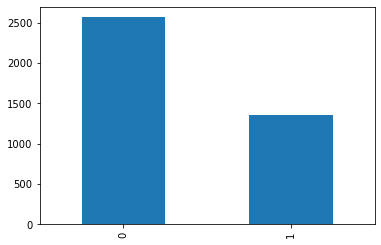

In [21]:
df[df['monthly_charges']>monthly_avg].churn.value_counts().plot.bar()


<AxesSubplot:>

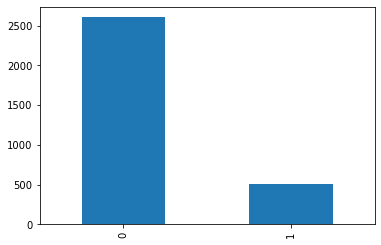

In [22]:
df[df['monthly_charges']<monthly_avg].churn.value_counts().plot.bar()

<AxesSubplot:title={'center':'Less than Avg'}>

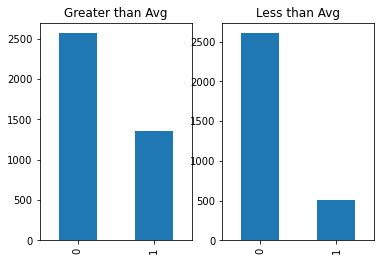

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df[df['monthly_charges']>monthly_avg].churn.value_counts().plot(ax=axes[0], kind='bar',title='Greater than Avg')
df[df['monthly_charges']<monthly_avg].churn.value_counts().plot(ax=axes[1], kind='bar',title='Less than Avg')

In [24]:
alpha = .05
churn_sample = train[train.churn == 1].monthly_charges
overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

if p < alpha:
    print('There is a statistically significant difference')

There is a statistically significant difference


In [25]:
overall_mean

64.91416434187154

## Do customers with a partner or dependents churn at a different rate?

<AxesSubplot:title={'center':'No Dependent or Partner'}>

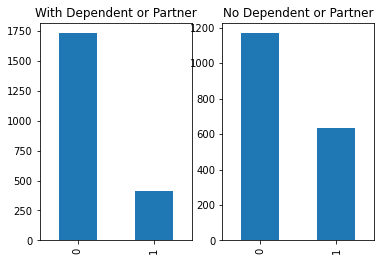

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2)
train[(train.partner==1) | (train.dependents==1)].churn.value_counts().plot(ax=axes[0], kind='bar',title='With Dependent or Partner')

train[(train.partner==0) & (train.dependents==0)].churn.value_counts().plot(ax=axes[1], kind='bar',title='No Dependent or Partner')

In [27]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,churn_month,addons,partner_dep,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,1,1,0,1,0,0,1,0,1,1,0,1,65.6,593.30,0,One year,DSL,Mailed check,NaN,4,1,0,1,0,0,0,0,0,1
1,Male,0,0,0,0,1,1,0,0,0,0,0,1,0,59.9,542.40,0,Month-to-month,DSL,Mailed check,NaN,3,0,1,0,0,0,0,0,0,1
2,Male,0,0,0,0,1,0,0,0,1,0,0,0,1,73.9,280.85,1,Month-to-month,Fiber optic,Electronic check,2022-01-31,2,0,1,0,0,1,0,0,1,0
3,Male,0,1,0,0,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,Month-to-month,Fiber optic,Electronic check,2022-01-31,5,1,1,0,0,1,0,0,1,0
4,Female,0,1,0,0,1,0,0,0,0,1,1,0,1,83.9,267.40,1,Month-to-month,Fiber optic,Mailed check,2022-01-31,3,1,0,0,0,1,0,0,0,1


In [28]:
observed = pd.crosstab(train.churn, train.partner_dep)
observed

partner_dep,0,1
churn,,
0,1169,1728
1,634,412


In [29]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [30]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[1169 1728]
 [ 634  412]]
---
Expected Values

[[1324 1572]
 [ 478  567]]
---

chi^2 = 126.2910
p     = 0.0000


## What month are customers most likely to churn?

In [31]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,churn_month,addons,partner_dep,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1320,Female,0,0,0,0,1,0,0,0,0,0,0,0,0,20.40,20.40,1,Month-to-month,None,Mailed check,2022-01-31,1,0,0,0,0,0,1,0,0,1
6590,Male,0,0,0,0,1,0,0,0,0,0,0,0,0,20.70,73.05,0,Month-to-month,None,Mailed check,NaN,1,0,1,0,0,0,1,0,0,1
3490,Female,0,0,0,0,1,0,0,0,1,0,1,0,1,59.55,1646.45,0,Month-to-month,DSL,Bank transfer (automatic),NaN,3,0,0,0,0,0,0,0,0,0
4745,Male,0,1,1,0,1,0,0,0,0,0,0,0,1,20.95,1270.55,0,Two year,None,Bank transfer (automatic),NaN,1,1,1,0,1,0,1,0,0,0
3268,Female,0,0,0,0,1,1,1,1,1,1,1,0,1,79.85,4861.45,0,Two year,DSL,Credit card (automatic),NaN,7,0,0,0,1,0,0,1,0,0


In [32]:
train[train['churn']==1][['churn_month']].value_counts()

churn_month
2022-01-31     1046
dtype: int64

## Do customers with more addons churn at a different rate?

<AxesSubplot:xlabel='churn', ylabel='count'>

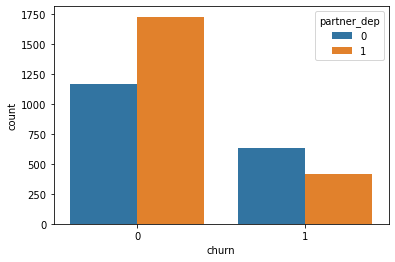

In [33]:
sns.countplot(data=train,x='churn',hue='partner_dep')

Run a chi square test to check for statistically significant relationship

In [34]:
observed = pd.crosstab(train.churn,train.partner_dep)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [35]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[1169 1728]
 [ 634  412]]
---
Expected Values

[[1324 1572]
 [ 478  567]]
---

chi^2 = 126.2910
p     = 0.0000


In [36]:
train.dtypes

gender                                   object
senior_citizen                            int64
partner                                   int64
dependents                                int64
tenure                                    int64
phone_service                             int64
multiple_lines                            int64
online_security                           int64
online_backup                             int64
device_protection                         int64
tech_support                              int64
streaming_tv                              int64
streaming_movies                          int64
paperless_billing                         int64
monthly_charges                         float64
total_charges                           float64
churn                                     int64
contract_type                            object
internet_service_type                    object
payment_type                             object
churn_month                             

In [37]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,churn_month,addons,partner_dep,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1320,Female,0,0,0,0,1,0,0,0,0,0,0,0,0,20.40,20.40,1,Month-to-month,None,Mailed check,2022-01-31,1,0,0,0,0,0,1,0,0,1
6590,Male,0,0,0,0,1,0,0,0,0,0,0,0,0,20.70,73.05,0,Month-to-month,None,Mailed check,NaN,1,0,1,0,0,0,1,0,0,1
3490,Female,0,0,0,0,1,0,0,0,1,0,1,0,1,59.55,1646.45,0,Month-to-month,DSL,Bank transfer (automatic),NaN,3,0,0,0,0,0,0,0,0,0
4745,Male,0,1,1,0,1,0,0,0,0,0,0,0,1,20.95,1270.55,0,Two year,None,Bank transfer (automatic),NaN,1,1,1,0,1,0,1,0,0,0
3268,Female,0,0,0,0,1,1,1,1,1,1,1,0,1,79.85,4861.45,0,Two year,DSL,Credit card (automatic),NaN,7,0,0,0,1,0,0,1,0,0


In [38]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,churn_month,addons,partner_dep,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1320,Female,0,0,0,0,1,0,0,0,0,0,0,0,0,20.40,20.40,Month-to-month,None,Mailed check,2022-01-31,1,0,0,0,0,0,1,0,0,1
6590,Male,0,0,0,0,1,0,0,0,0,0,0,0,0,20.70,73.05,Month-to-month,None,Mailed check,NaN,1,0,1,0,0,0,1,0,0,1
3490,Female,0,0,0,0,1,0,0,0,1,0,1,0,1,59.55,1646.45,Month-to-month,DSL,Bank transfer (automatic),NaN,3,0,0,0,0,0,0,0,0,0
4745,Male,0,1,1,0,1,0,0,0,0,0,0,0,1,20.95,1270.55,Two year,None,Bank transfer (automatic),NaN,1,1,1,0,1,0,1,0,0,0
3268,Female,0,0,0,0,1,1,1,1,1,1,1,0,1,79.85,4861.45,Two year,DSL,Credit card (automatic),NaN,7,0,0,0,1,0,0,1,0,0


In [39]:
X_train = X_train.select_dtypes(exclude ='object')
X_val = X_val.select_dtypes(exclude ='object')
X_test = X_test.select_dtypes(exclude ='object')

In [48]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [40]:
# RandomForest - suboptimal parameters
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=21)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))



Accuracy of random forest classifier on training set: 0.77


In [55]:
# RandomForest - optimal parameters
rf = RandomForestClassifier(n_estimators= 200,
                             min_samples_split= 5,
                             min_samples_leaf= 4,
                             max_features= 'auto',
                             max_depth= 10,
                             bootstrap= True, 
                            random_state=21)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on validation set: {:.2f}'
     .format(rf.score(X_val, y_val)))
print('Accuracy of random forest classifier on validation set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on training set: 0.85
Accuracy of random forest classifier on validation set: 0.82
Accuracy of random forest classifier on validation set: 0.79
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   6.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.6s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   6.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   4.4s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.3s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   3.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   6.3s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, max_depth=110

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   6.6s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   3.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   2.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END bootstrap=True, max_depth=8

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   2.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   3.7s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   3.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   5.2s
[CV] END bootstrap=False, max_depth=70

In [41]:
# LogisticRegression
lr = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=21, intercept_scaling=1, solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_pred_proba = lr.predict_proba(X_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))




Accuracy of Logistic Regression classifier on training set: 0.34


In [42]:
# K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


Accuracy of KNN classifier on training set: 0.83


3 columns: customer_id, probability of churn, and prediction of churn. (1=churn, 0=not_churn).

In [43]:
customer_id

0       0002-ORFBO
1       0003-MKNFE
2       0004-TLHLJ
3       0011-IGKFF
4       0013-EXCHZ
           ...    
7038    9987-LUTYD
7039    9992-RRAMN
7040    9992-UJOEL
7041    9993-LHIEB
7042    9995-HOTOH
Name: customer_id, Length: 7043, dtype: object

In [44]:
full = full.select_dtypes(exclude ='object')

In [45]:
full.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,addons,partner_dep,gender_Male,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,0,1,0,0,1,0,1,1,0,1,65.6,593.30,0,4,1,0,1,0,0,0,0,0,1
1,0,0,0,0,1,1,0,0,0,0,0,1,0,59.9,542.40,0,3,0,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,1,0,0,0,1,73.9,280.85,1,2,0,1,0,0,1,0,0,1,0
3,0,1,0,0,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,5,1,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,1,0,1,83.9,267.40,1,3,1,0,0,0,1,0,0,0,1


In [46]:
y_pred_proba

array([[0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2]])

In [47]:
y_pred = knn.predict(full)
y_pred_proba = knn.predict_proba(full)
y_pred = pd.Series(y_pred)
y_pred_proba = pd.DataFrame(y_pred_proba)
y_pred_proba = y_pred_proba.iloc[:,1]
type(y_pred_proba)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 26 while Y.shape[1] == 25

In [ ]:
y_pred_proba.iloc[:,1]

In [ ]:
y_pred = knn.predict(full)
y_pred_proba = knn.predict_proba(full)
y_pred = pd.Series(y_pred)
y_pred_proba = pd.DataFrame(y_pred_proba)
y_pred_proba = y_pred_proba.iloc[:,1]
pred = pd.concat([customer_id,y_pred,y_pred_proba],axis=1)
pred.columns = ['customer_id','prediction','probability']


In [ ]:
pred.columns = ['customer_id','prediction','probability']


In [ ]:
pred.head()

In [ ]:
full.head()

In [ ]:
full = full.drop(columns='churn')

In [ ]:
X_train.head()

In [ ]:
X_train.shape

In [57]:
full.shape

(7043, 26)

In [ ]:
pd.concat([customer_id,full],axis=1)

In [58]:
# K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [4]:
import pickle
filename = 'test_pickle.sav'
pickle.dump(knn, open(filename, 'wb'))
knn = pickle.load(open(filename, 'rb'))

In [61]:

pickle.dump(knn, open(filename, 'wb'))

In [7]:
knn = pickle.load(open(filename, 'rb'))


In [8]:
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [6]:
loaded_model.predict(X_train)

NameError: name 'X_train' is not defined